In [1]:
import pandas as pd
import numpy as np
import os
import csv
import json
import matplotlib.pyplot as plt

In [2]:
rel2id = json.load(open("datasets/embed/relation_to_id.json"))
id2rel = {int(v): k for k, v in rel2id.items()}
rel_emb = np.load('datasets/embed/relation_embeddings.npy')

In [3]:
# Cut off to (29, 400)
rel_emb = rel_emb[:29, :]
rel_emb.shape

(29, 400)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(rel_emb)
idx = np.flip(np.argsort(similarity), axis=1)

max_pairs = []
for i in range(idx.shape[0]):
    j = 1
    while (similarity[i][idx[i][j]] > 0.9):
        max_pairs.append((id2rel[idx[i][0]], id2rel[idx[i][j]], similarity[i][idx[i][j]]))
        j += 1

def sort_score(pair):
    return pair[2]

max_pairs.sort(reverse=True, key=sort_score)
sim_pairs = []
for i, pair in enumerate(max_pairs):
    if i % 2 == 0:
        sim_pairs.append(pair)


In [ ]:
similarity=similarity.flatten()
print(similarity.shape)

# cleanup self-compare and dup-compare
s = similarity < 0.99
s = np.unique(similarity[s])

# plt.figure(figsize=(12, 8))
# plt.xlabel('Cosine similarity', labelpad=15, fontsize=16, fontweight='bold')
# plt.ylabel('Relation pairs', labelpad=15, fontsize=16, fontweight='bold')
# plt.xticks(fontsize=11)
# plt.yticks(fontsize=11)
# plt.hist(s)
# plt.savefig('relation-sim.eps', format='eps')

(841,)


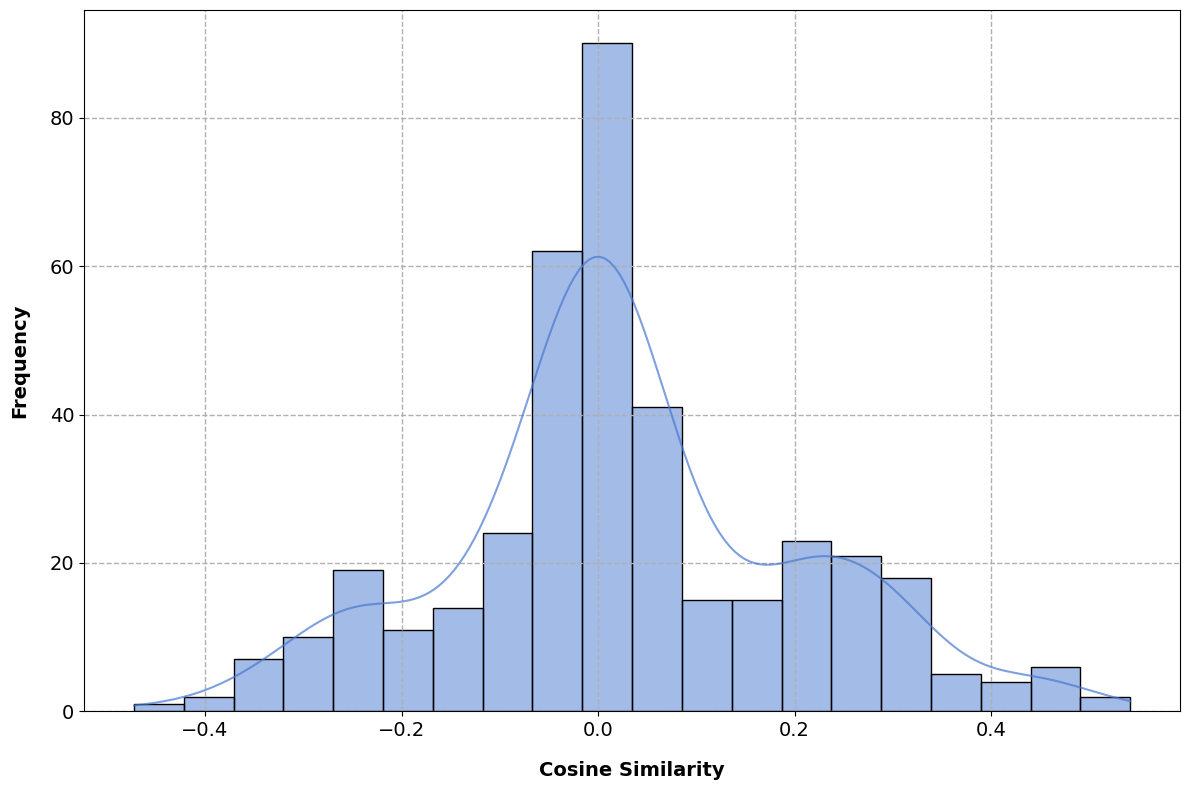

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume `s` is already computed as shown
plt.figure(figsize=(12, 8))

# Set colors with opacity using the `alpha` parameter
sns.histplot(s, bins=20, kde=True, color=sns.color_palette("muted")[0], edgecolor='black', line_kws={'color': sns.color_palette("muted")[3], 'alpha': 0.7}, alpha=0.5)

# Adding labels and title
font_size = 14
plt.xlabel('Cosine Similarity', labelpad=15, fontsize=font_size, fontweight='bold')
plt.ylabel('Frequency', labelpad=15, fontsize=font_size, fontweight='bold')

# Adjusting the font size of the axis tick labels
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Thinner grid lines with zorder to ensure they are below the plot elements
plt.grid(axis='y', linestyle='--', linewidth=1, zorder=0)
plt.grid(axis='x', linestyle='--', linewidth=1, zorder=0)

# Show the plot
plt.tight_layout()
plt.show()
